In [1]:
import sys
import os
sys.path.append('D:\桌面\pytest\VAE学习及示例')

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from data_prepare import dataset,data_vision
from train import train_AE
from model import AutoEncoder
from torch.nn import functional as F

In [3]:
import argparse
def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--dataset_name', type=str, default='cifar', help='the name of dataset, minst or cifar')
    parser.add_argument('--seed', type=int, default=23, help='seed for random')
    parser.add_argument('--data_path', type=str, default=r'D:\桌面\pytest\VAE学习及示例\data', help='the data_path')
    parser.add_argument('--batch_size', type=int, default=64, help='the batch size')
    parser.add_argument('--epochs', type=int, default=20, help='the epochs')
    parser.add_argument('--lr', type=float, default=0.001, help='the epochs')
    parser.add_argument('--latent_dim', type=int, default=50, help='the latent_dim')
    opt = parser.parse_args(args=[])

    return opt
args = parse_args()  

In [4]:
args

Namespace(dataset_name='minst', seed=23, data_path='D:\\桌面\\pytest\\VAE学习及示例\\data', batch_size=64, epochs=20, lr=0.001, latent_dim=50)

In [5]:
train_dl, test_dl = dataset.get_dataset(args)
a,b = next(iter(test_dl))

113333
minst
111


torch.Size([64, 3, 32, 32])


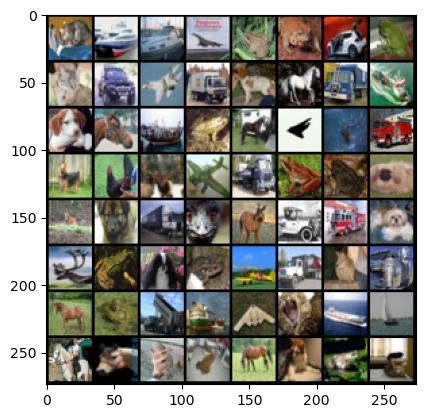

标签:  3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 5 2 4 0 9 6 6 5 4 5 9 2 4 1 9 5 4 6 5 6 0 9 3 9 7 6 9 8 0 3 8 8 7 7 4 6 7 3 6 3


In [5]:
data_vision.pre_visualization(train_dl,test_dl,args)

In [6]:
model = AutoEncoder(args).cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=args.lr)

In [7]:
train_AE(model, optimizer, train_dl, test_dl, criterion, args.epochs)

Epoch: 1 	Training Loss: 1.295455
Epoch: 2 	Training Loss: 0.655915
Epoch: 3 	Training Loss: 0.531735
Epoch: 4 	Training Loss: 0.488165
Epoch: 5 	Training Loss: 0.460001
Epoch: 6 	Training Loss: 0.435655
Epoch: 7 	Training Loss: 0.414950
Epoch: 8 	Training Loss: 0.406367
Epoch: 9 	Training Loss: 0.400702
Epoch: 10 	Training Loss: 0.396295
Epoch: 11 	Training Loss: 0.392468
Epoch: 12 	Training Loss: 0.389321
Epoch: 13 	Training Loss: 0.386309
Epoch: 14 	Training Loss: 0.383400
Epoch: 15 	Training Loss: 0.380963
Epoch: 16 	Training Loss: 0.378418
Epoch: 17 	Training Loss: 0.376319
Epoch: 18 	Training Loss: 0.374211
Epoch: 19 	Training Loss: 0.372521
Epoch: 20 	Training Loss: 0.370937


In [8]:
torch.save(model.state_dict(), 'model.pth')
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

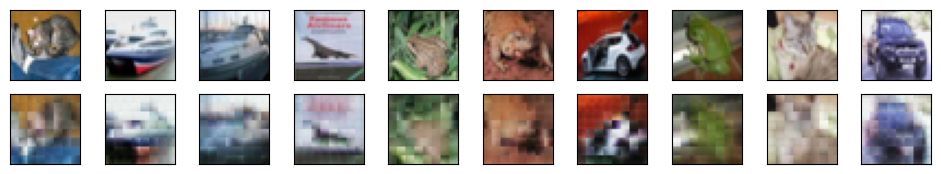

In [9]:
data_vision.cifar_after_train_see(model, test_dl, args)
# data_vision.minst_after_train_see(model, test_dl, args)